In [1]:
%matplotlib inline
import math, sys, os
import numpy as np
from numpy.random import random
from matplotlib import pyplot as plt, rcParams, animation, rc
from __future__ import print_function, division
from ipywidgets import interact, interactive, fixed
from ipywidgets.widgets import *
rc('animation', html='html5')
rcParams['figure.figsize'] = 3, 3
%precision 4
np.set_printoptions(precision = 4, linewidth = 100)

u'%.4f'

In [2]:
def line(a, b, x):
    return a * x + b

In [3]:
a = 3.
b = 8.

In [4]:
n = 30
x = random(n)
y = line(a, b, x)

In [5]:
x

array([ 0.556 ,  0.5147,  0.7325,  0.5962,  0.7084,  0.5725,  0.7063,  0.8044,  0.3835,  0.7583,
        0.9699,  0.9542,  0.1943,  0.6902,  0.1977,  0.3795,  0.1453,  0.1019,  0.7226,  0.5138,
        0.6545,  0.5496,  0.9649,  0.2723,  0.8774,  0.4553,  0.0167,  0.7351,  0.7271,  0.8314])

In [6]:
y

array([  9.668 ,   9.544 ,  10.1975,   9.7887,  10.1252,   9.7175,  10.1188,  10.4132,   9.1506,
        10.275 ,  10.9097,  10.8627,   8.5829,  10.0706,   8.5931,   9.1386,   8.4358,   8.3056,
        10.1677,   9.5414,   9.9634,   9.6488,  10.8946,   8.817 ,  10.6323,   9.3659,   8.0501,
        10.2054,  10.1814,  10.4943])

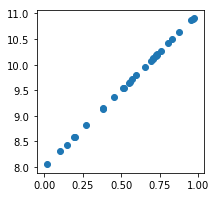

In [7]:
plt.scatter(x, y)

In [8]:
def sse(y, predicted_y):
    return ((y - predicted_y) ** 2).sum()
def loss(y, a, b, x):
    return sse(y, line(a, b, x))
def avg_loss(y, a, b, x):
    return np.sqrt(loss(y, a, b, x) / n)

In [9]:
a_guess = -1.
b_guess = 1.
avg_loss(y, a_guess, b_guess, x)

9.3632

In [10]:
lr = 0.01

In [11]:
def take_an_sgd_step():
    global a_guess, b_guess
    predicted_y = line(a_guess, b_guess, x)
    dydb = 2 * (predicted_y - y)
    dyda = x * dydb
    a_guess -= lr * dyda.mean()
    b_guess -= lr * dydb.mean()

In [12]:
fig = plt.figure(dpi = 100, figsize = (5, 4))
plt.scatter(x, y)
predicted_line, = plt.plot(x, line(a_guess, b_guess, x))
plt.close()

def animate(i):
    predicted_line.set_ydata(line(a_guess, b_guess, x))
    for i in range(10): take_an_sgd_step()
    return predicted_line,

sgd_animation = animation.FuncAnimation(fig, animate, np.arange(0, 40), interval = 100)
sgd_animation